In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport model.dntm.MemoryReadingsStats, visualization.MemoryReadingsPlot

In [3]:
import pandas as pd
import seaborn as sns

from hydra import compose, initialize
from model.dntm.MemoryReadingsStats import MemoryReadingsStats
from visualization.MemoryReadingsPlot import KLDivergencePlot, \
    MemoryReadingsPlot

In [4]:
initialize(config_path="../conf/local", job_name="visualize_mem_readings")
cfg = compose(config_name="train_smnist")

In [5]:
! ls ../data/interim/memory_readings/

2022-07-05  pmnist-2022-07-09-18-14  smnist-2022-07-09-09-21


In [6]:
EPOCH = 22
PATH = "../data/interim/memory_readings/smnist-2022-07-09-09-21"

In [7]:
EPOCH = 18
PATH = "../data/interim/memory_readings/pmnist-2022-07-09-18-14"

In [8]:
OVERALL_MEMORY_SIZE = 16

In [9]:
memory_reading_stats = MemoryReadingsStats(path=PATH)

In [11]:
memory_reading_stats.init_random_matrix(OVERALL_MEMORY_SIZE)
memory_reading_stats.load_memory_readings(EPOCH)
memory_reading_stats.compute_stats()

In [13]:
memory_readings_df = pd.DataFrame(
    memory_reading_stats.memory_readings.mean(dim=1).numpy(), columns=["mean"]
)
memory_readings_df["variance"] = pd.Series(
    memory_reading_stats.memory_readings.std(dim=1)
)
memory_readings_df["mem_location"] = pd.Series(range(OVERALL_MEMORY_SIZE))

In [14]:
memory_readings_plot = MemoryReadingsPlot(cfg, memory_readings_df)

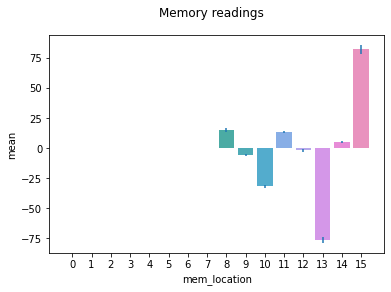

In [16]:
memory_readings_plot.plot(PATH.split("/")[-1] + "_mem_readings")

In [17]:
memory_reading_stats.kl_divergence

kl_div_df = pd.DataFrame(range(OVERALL_MEMORY_SIZE), columns=["mem_location"])
kl_div_df["mean"] = memory_reading_stats.kl_divergence.mean(dim=1)
kl_div_df["std"] = memory_reading_stats.kl_divergence.std(dim=1)

In [18]:
kl_div_df

,mem_location,mean,std
0,0,91.278534,121.816154
1,1,89.949158,121.794930
2,2,92.845367,122.736626
3,3,95.603920,123.468063
4,4,88.367668,120.204590
5,5,93.258446,121.917816
6,6,89.938438,121.464096
7,7,91.156059,120.918015
8,8,-249.231354,310.725067
9,9,223.140396,286.981140


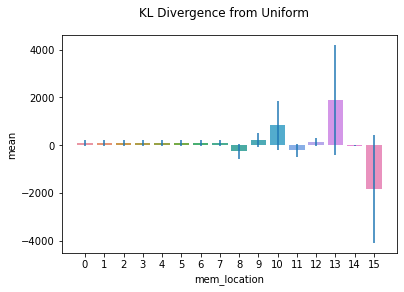

In [19]:
kl_divergence_plot = KLDivergencePlot(cfg, kl_div_df)
kl_divergence_plot.plot(PATH.split("/")[-1] + "_kl_div")

In [85]:
memory_reading_stats.init_random_matrix(OVERALL_MEMORY_SIZE)

Is the matrix (approximately) orthonormal?

<AxesSubplot:>

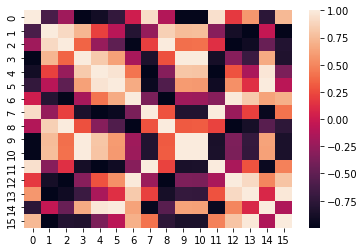

In [86]:
_ = sns.heatmap(
    memory_reading_stats.random_matrix @ memory_reading_stats.random_matrix.T
)

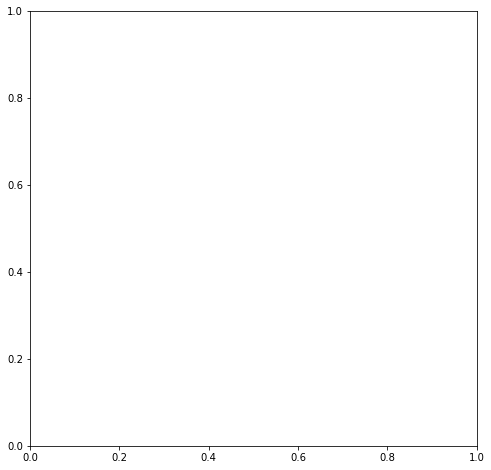

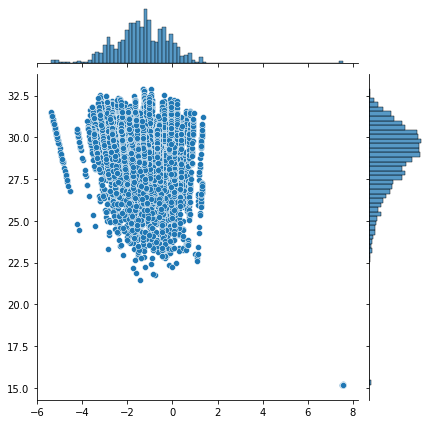

In [87]:
memory_reading_stats.plot_random_projections()